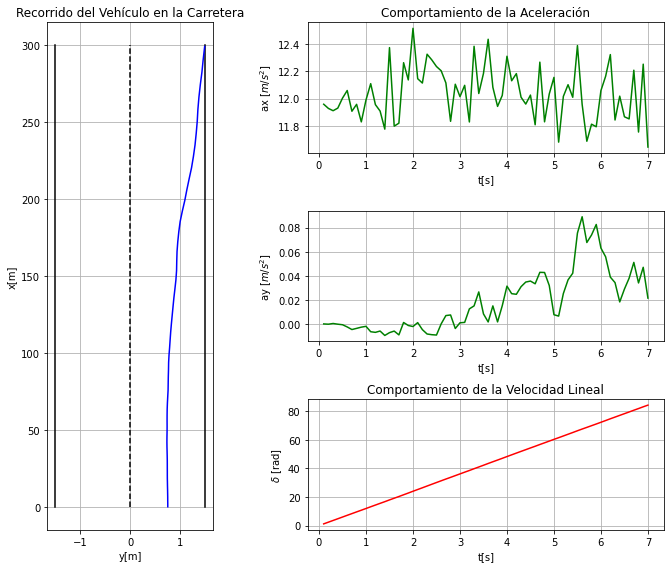

In [3]:
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append("..")

from src.vehicle import Vehicle

# Crear un vehículo en la posición inicial (0, 0, 0)
initial_state  = np.array([0, 0.75, 0])
inicial_motion = np.array([0,0])
vehicle_params = {'refoffset': 1.5, 'wheelbase': 3, 'maxsteer': 0.5}

# Instancia Vehiculo
vehicle        = Vehicle(initial_state, inicial_motion, vehicle_params)

# Simular el recorrido en la carretera recta con ruido en aceleración y y ruido en delta

acc             = 6.0                  # Aceleración constante en m/s2
delta           = 0.0                  # Angulo del timon en rad
duration        = 7.0                 # Duración de la simulación en segundos
num_steps       = int(duration / 0.1)  # Número de pasos de simulación
acc_noise_std   = 0.2                  # Desviación estándar del ruido en aceleración
delta_noise_std = 0.0005                # Desviación estándar del ruido en delta


# Carretera
road_width = 3 # Ancho en metros
road_y     = np.linspace(0, 300, num_steps)
road_shape = lambda x: 0

t = 0
deltas = []
for _ in range(num_steps):
    t += 0.1   # delta de tiempo
    delta_noisy = delta  + np.random.normal(delta, delta_noise_std)
    acc_noisy   = acc    + np.random.normal(acc, acc_noise_std)
    vehicle.vehicle_update(t, acc_noisy, delta_noisy)
    deltas.append(delta_noisy)


time            = np.array(vehicle.time)
x_positions     = np.array(vehicle.states)[:,0]
y_positions     = np.array(vehicle.states)[:,1]
theta_positions = np.array(vehicle.states)[:,2]
acceleration    = np.array(vehicle.accelerometer)

# Graficar el recorrido en la carretera y comportamientos en el tiempo
plt.figure(figsize=(12, 8))

# Grafica del recorrido en la carretera
plt.subplot(1, 4, 2)
# Road
plt.plot(np.zeros_like(road_y), road_y , 'k--', linewidth=1.5)
plt.plot(np.zeros_like(road_y) - 1.5, road_y, 'k-', linewidth=1.5)
plt.plot(np.zeros_like(road_y) + 1.5, road_y, 'k-', linewidth=1.5)


plt.plot(y_positions, x_positions, 'b-')
plt.title("Recorrido del Vehículo en la Carretera")
plt.xlabel("y[m]")
plt.ylabel("x[m]")
plt.grid(True)

# Grafica de la velocidad en el tiempo
plt.subplot(3, 2, 2)
plt.plot(time[1:], acceleration[1:,0], label = 'ax', color='g')
plt.title("Comportamiento de la Aceleración")
plt.xlabel("t[s]")
plt.ylabel(r"ax [$m/s^2$]")
plt.grid(True)

# Grafica de la velocidad en el tiempo
plt.subplot(3, 2, 4)
plt.plot(time[1:], acceleration[1:,1], label = 'ay', color='g')
plt.xlabel("t[s]")
plt.ylabel(r"ay [$m/s^2$]")
plt.grid(True)

# Grafica del ángulo de dirección en el tiempo
plt.subplot(3, 2, 6)
plt.plot(time[1:], vehicle.lineal_vel[1:], color='r')
plt.title("Comportamiento de la Velocidad Lineal")
plt.xlabel("t[s]")
plt.ylabel(r"$\delta$ [rad]")
plt.grid(True)

plt.ylim()
plt.tight_layout()
plt.show()